# Human Activity Recognition using Smartphone Data

<table><tr><td><img src="photo-1561557944-6e7860d1a7eb.jpeg" width=250 height=250 /></td><td>
    <img src="images (1).jpeg" width=250 height=250 /></td></tr></table>
Here we will be using machine learning to do human activity recognition on smartphone data

we are going to use data gotten  from people who use their mobile phone  regularly. we are going to classify the sequence of accelerometer data recorded by specalised smartphones that does a wholesum  of human  activites

we are going to be predicting the activity of a person based on their movewment using sensors.But here we are going to be doing machine learning.no deep learning involved.

lets dive into it

we are going to start by importing our libraries 

In [2]:
# importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


Time to import the necessary dataset
since we are dealing with a csv type of data we use the method pd.read_csv
assuming we were using a excel format we will use the pandas method pd.read_excel

we are going to be importing both train and test data

In [3]:
#importing the necessary datasets
test_data= pd.read_csv("testdata.csv")
train_data= pd.read_csv("traindata.csv")

In [4]:
#printing the first 5 rows of the dataframe
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [5]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
#transposing so as to view all the columns
train_data.head().T

,0,1,2,3,4
tBodyAcc-mean()-X,0.288585,0.278419,0.279653,0.279174,0.276629
tBodyAcc-mean()-Y,-0.020294,-0.016411,-0.019467,-0.026201,-0.01657
tBodyAcc-mean()-Z,-0.132905,-0.12352,-0.113462,-0.123283,-0.115362
tBodyAcc-std()-X,-0.995279,-0.998245,-0.99538,-0.996091,-0.998139
tBodyAcc-std()-Y,-0.983111,-0.9753,-0.967187,-0.983403,-0.980817
...,...,...,...,...,...
"angle(X,gravityMean)",-0.841247,-0.844788,-0.848933,-0.848649,-0.847865
"angle(Y,gravityMean)",0.179941,0.180289,0.180637,0.181935,0.185151
"angle(Z,gravityMean)",-0.058627,-0.054317,-0.049118,-0.047663,-0.043892
subject,1,1,1,1,1


In [7]:
test_data.head().T

,0,1,2,3,4
tBodyAcc-mean()-X,0.257178,0.286027,0.275485,0.270298,0.274833
tBodyAcc-mean()-Y,-0.023285,-0.013163,-0.02605,-0.032614,-0.027848
tBodyAcc-mean()-Z,-0.014654,-0.119083,-0.118152,-0.11752,-0.129527
tBodyAcc-std()-X,-0.938404,-0.975415,-0.993819,-0.994743,-0.993852
tBodyAcc-std()-Y,-0.920091,-0.967458,-0.969926,-0.973268,-0.967445
...,...,...,...,...,...
"angle(X,gravityMean)",-0.720009,-0.698091,-0.702771,-0.698954,-0.692245
"angle(Y,gravityMean)",0.276801,0.281343,0.280083,0.284114,0.290722
"angle(Z,gravityMean)",-0.057978,-0.083898,-0.079346,-0.077108,-0.073857
subject,2,2,2,2,2


In [10]:
#description of both data 

train_data.describe

<bound method NDFrame.describe of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245   

In [11]:
test_data.describe

<bound method NDFrame.describe of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.257178          -0.023285          -0.014654   
1              0.286027          -0.013163          -0.119083   
2              0.275485          -0.026050          -0.118152   
3              0.270298          -0.032614          -0.117520   
4              0.274833          -0.027848          -0.129527   
...                 ...                ...                ...   
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.938404         -0.920091         -0.667683         -0.952501   
1            -0.975415   

In [17]:
#to check the sum of null values
train_data.isnull().sum



<bound method NDFrame._add_numeric_operations.<locals>.sum of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0                 False              False              False   
1                 False              False              False   
2                 False              False              False   
3                 False              False              False   
4                 False              False              False   
...                 ...                ...                ...   
7347              False              False              False   
7348              False              False              False   
7349              False              False              False   
7350              False              False              False   
7351              False              False              False   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0                False             False             False             False 

In [21]:
test_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0                 False              False              False   
1                 False              False              False   
2                 False              False              False   
3                 False              False              False   
4                 False              False              False   
...                 ...                ...                ...   
2942              False              False              False   
2943              False              False              False   
2944              False              False              False   
2945              False              False              False   
2946              False              False              False   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0                False             False             False             False 

In [19]:
test_data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0                 False              False              False   
1                 False              False              False   
2                 False              False              False   
3                 False              False              False   
4                 False              False              False   
...                 ...                ...                ...   
2942              False              False              False   
2943              False              False              False   
2944              False              False              False   
2945              False              False              False   
2946              False              False              False   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0                False             False             False             False 

In [23]:
#the shape of the data
test_data.shape,train_data.shape

((2947, 563), (7352, 563))

In [27]:
test_data.duplicated().any(),train_data.duplicated().any()

(False, False)

In [30]:
test_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

now we know that we dont have aqny duplicated data and also we dont have any null value so now we can proceed

In [34]:
train_data["Data"] = "Train"
test_data["Data"] = "Test"

In [36]:
concat_data= pd.concat([train_data,test_data], axis=0).reset_index(drop= True)

In [37]:
concat_data.shape

(10299, 564)

In [38]:
concat_data.dtypes.value_counts()

float64    561
object       2
int64        1
dtype: int64

In [41]:
concat_data["subject"] = "#"+concat_data["subject"].astype(str)

In [42]:
concat_data.dtypes.value_counts()

float64    561
object       3
dtype: int64

In [43]:
concat_data["subject"].head()

0    #1
1    #1
2    #1
3    #1
4    #1
Name: subject, dtype: object

In [44]:
train_data["Data"].head()

0    Train
1    Train
2    Train
3    Train
4    Train
Name: Data, dtype: object

<BarContainer object of 6 artists>

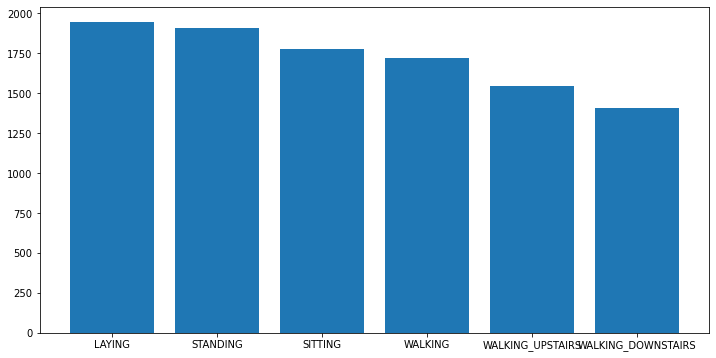

In [46]:
activities= concat_data["Activity"]
counts = activities.value_counts()

plt.figure(figsize=(12,6))
plt.bar(counts.index,counts)

In [49]:
#plotting the pie chart 
counts.index

Index(['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS',
       'WALKING_DOWNSTAIRS'],
      dtype='object')

In [51]:
counts.values

array([1944, 1906, 1777, 1722, 1544, 1406], dtype=int64)

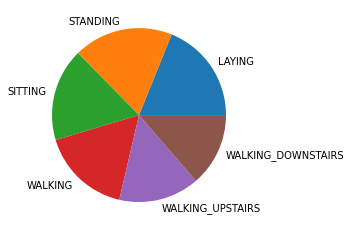

In [54]:
plt.pie(counts.values,labels= counts.index)
plt.show()

Time for scaling the data

In [61]:
Data = concat_data["Data"]
subj= concat_data["subject"]
train_data= concat_data.copy()
train_data = train_data.drop(["Data","subject","Activity"], axis=1)

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [63]:
st_sca = StandardScaler()
train_data= st_sca.fit_transform(train_data)

In [65]:
Mm_sca= MinMaxScaler()
train_data1= Mm_sca.fit_transform(train_data)


In [66]:
#dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9,random_state=0)
train_data=pca.fit_transform(train_data)

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9,random_state=0)
train_data1=pca.fit_transform(train_data1)

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data,activities,test_size= 0.2,random_state=0)

In [101]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(train_data1,activities,test_size= 0.2,random_state=0)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
from sklearn import tree

model= KNeighborsClassifier()

In [76]:
model= KNeighborsClassifier()

In [77]:
model1 = svm.SVC()

In [78]:
model2= tree.DecisionTreeClassifier()

In [86]:
results={}
accuracy={}
A= cross_val_score(model,X_train,y_train,cv=10,scoring= "accuracy")
results["Arcv"]=(A.mean(),A.std())


In [87]:
model.fit(X_train,y_train)
y_pred= model.predict(X_test)


In [88]:
y_pred

array(['SITTING', 'WALKING_DOWNSTAIRS', 'LAYING', ..., 'SITTING',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [89]:
accuracy_score(y_test,y_pred)

0.9529126213592233

In [92]:
model1.fit(X_train,y_train)
y_pred1= model1.predict(X_test)

In [93]:
accuracy_score(y_test,y_pred1)

0.9538834951456311

In [94]:
model2.fit(X_train,y_train)
y_pred2= model2.predict(X_test)

In [95]:
accuracy_score(y_test,y_pred2)

0.8432038834951456

In [102]:
results={}
accuracy={}
A1= cross_val_score(model,X_train1,y_train1,cv=10,scoring= "accuracy")
results["Arcv"]=(A1.mean(),A1.std())

In [103]:
model.fit(X_train1,y_train1)
y_predn= model.predict(X_test1)


In [104]:
accuracy_score(y_test1,y_predn)

0.9529126213592233

In [105]:
#USING THE BEST ACCURACY
accuracy["Arcv"]=accuracy_score(y_test,y_pred1)

0.9538834951456311

In [106]:
print(classification_report(y_test,y_pred1))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       377
           SITTING       0.89      0.89      0.89       364
          STANDING       0.90      0.90      0.90       390
           WALKING       0.98      0.99      0.99       335
WALKING_DOWNSTAIRS       0.99      0.97      0.98       278
  WALKING_UPSTAIRS       0.98      0.98      0.98       316

          accuracy                           0.95      2060
         macro avg       0.96      0.96      0.96      2060
      weighted avg       0.95      0.95      0.95      2060



<AxesSubplot:>

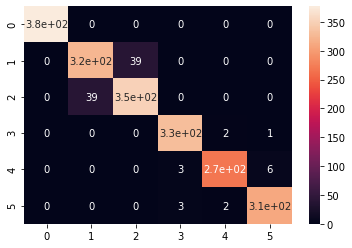

In [108]:
cm = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True)
